In [ ]:
!pip install eli5

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import pyplot

In [ ]:
url =("https://raw.githubusercontent.com/prarthanashetty29/DataScienceEngineering/main/Finalloan_approval_dataset.csv")
df = pd.read_csv(url);

In [ ]:
#creating a backup of the original data set
df_backup = df.copy()

In [ ]:
# Viewing the first few rows with column headers to understand the dataset
df.head()

loan_id   no_of_dependents      education  self_employed   income_annum  \
0        1                  2       Graduate             No        9600000   
1        2                  0   Not Graduate            Yes        4100000   
2        3                  3       Graduate             No        9100000   
3        4                  3       Graduate             No        8200000   
4        5                  5   Not Graduate            Yes        9800000   

    loan_amount   loan_term   cibil_score   residential_assets_value  \
0      29900000          12           778                    2400000   
1      12200000           8           417                    2700000   
2      29700000          20           506                    7100000   
3      30700000           8           467                   18200000   
4      24200000          20           382                   12400000   

    commercial_assets_value   luxury_assets_value   bank_asset_value  \
0                  17600000              22700000            8000000   
1                   2200000               8800000            3300000   
2                   4500000              33300000           12800000   
3                   3300000              23300000            7900000   
4                   8200000              29400000            5000000   

   loan_status  
0     Approved  
1     Rejected  
2     Rejected  
3     Rejected  
4     Rejected

# Assignment 1

## Q1) What are the data types? (Only numeric and categorical)

In [ ]:
#Finding out data types of the dataset --Understanding the dataset
df.dtypes

loan_id                       int64
 no_of_dependents             int64
 education                   object
 self_employed               object
 income_annum                 int64
 loan_amount                  int64
 loan_term                    int64
 cibil_score                  int64
 residential_assets_value     int64
 commercial_assets_value      int64
 luxury_assets_value          int64
 bank_asset_value             int64
 loan_status                 object
dtype: object

In [ ]:
#Finding out total rows and columns --Understanding the dataset
df.shape

(4269, 13)

### A1) We can deduce from this that we have 4269 rows and 13 columns in our dataset


#### Categorical:

education, self_employed, loan_status

#### Numerical:
loan_id, no_of_dependents, income_annum, loan_amount, loan_term, cibil_score, residential_assets_value, commercial_assets_value, luxury_assets_value, bank_asset_value   

## Q2) Are there missing values?

In [ ]:
df.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

## Q5) Which independent variables have missing data? How much?

### A2 and A5) As we can see based on this information, there are no missing values in any of these columns and for any independent variables.
**bold text**

## Q3) What are the likely distributions of the numeric variables?

<Figure size 800x500 with 0 Axes>

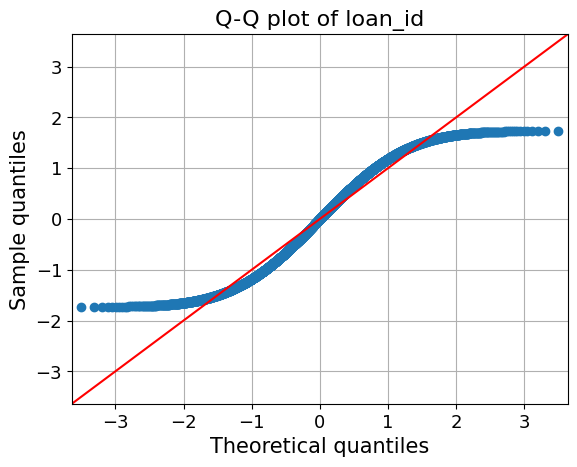

<Figure size 800x500 with 0 Axes>

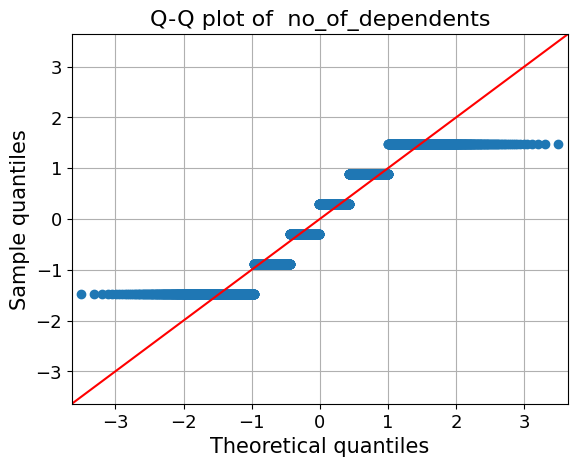

<Figure size 800x500 with 0 Axes>

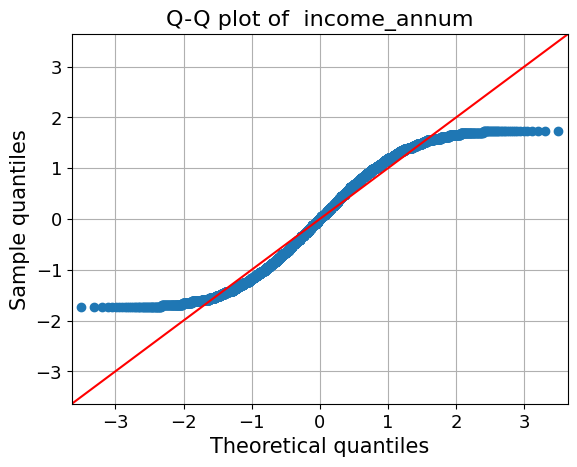

<Figure size 800x500 with 0 Axes>

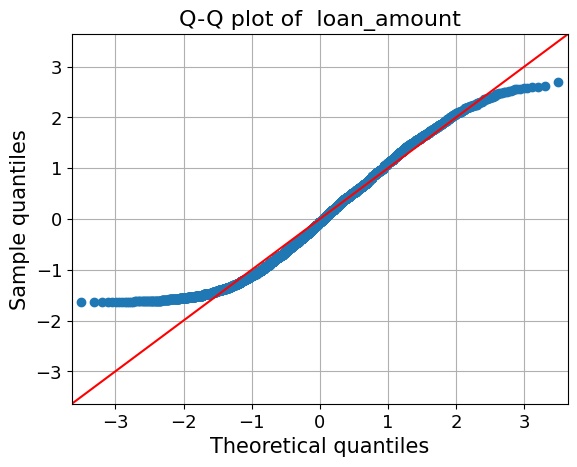

<Figure size 800x500 with 0 Axes>

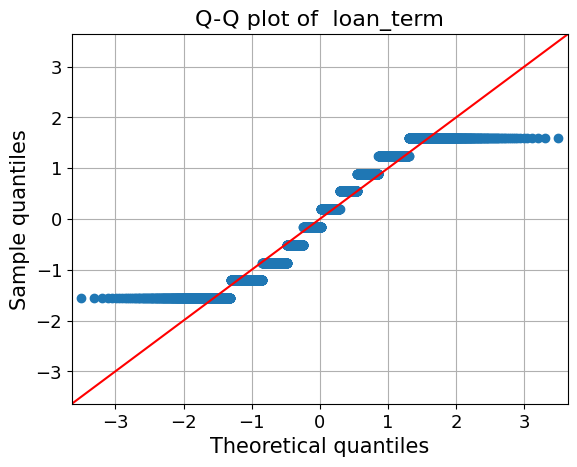

<Figure size 800x500 with 0 Axes>

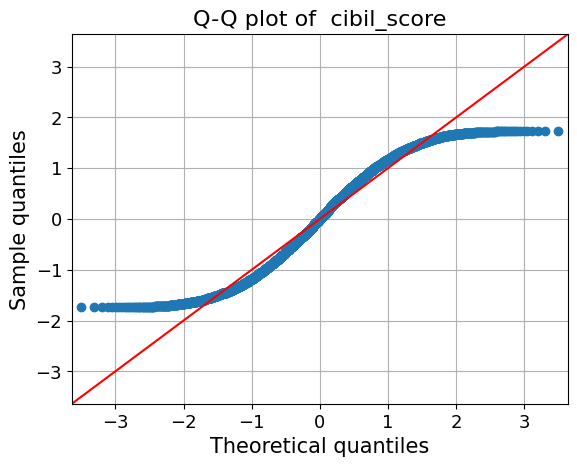

<Figure size 800x500 with 0 Axes>

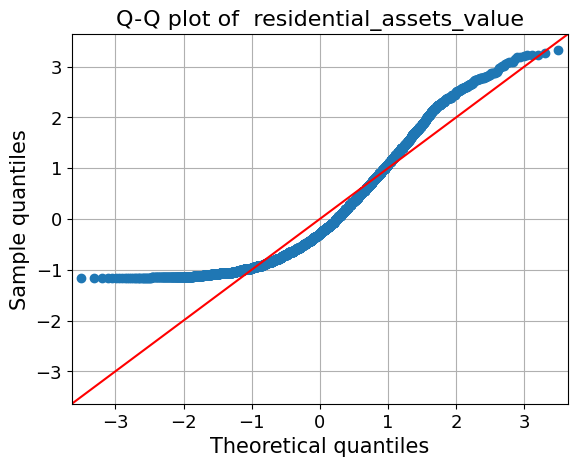

<Figure size 800x500 with 0 Axes>

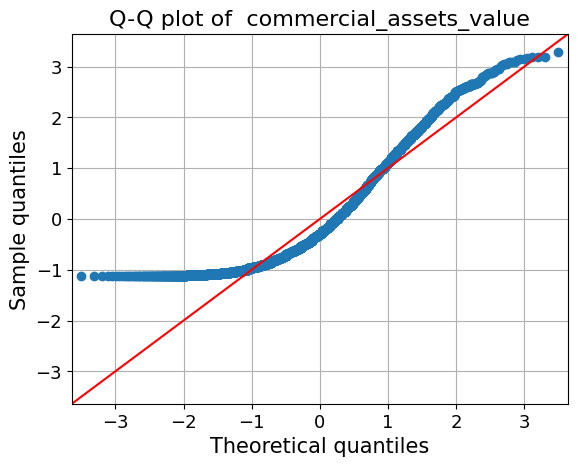

<Figure size 800x500 with 0 Axes>

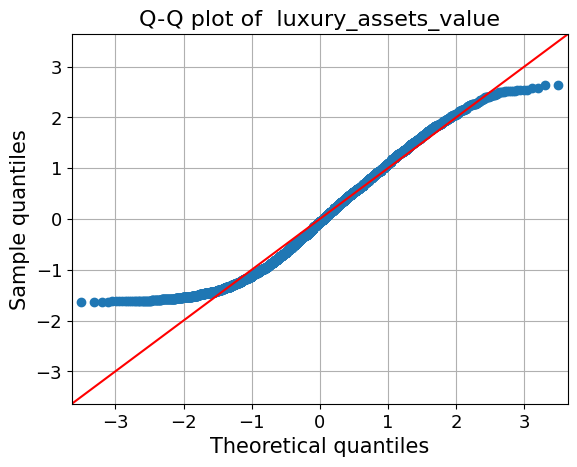

<Figure size 800x500 with 0 Axes>

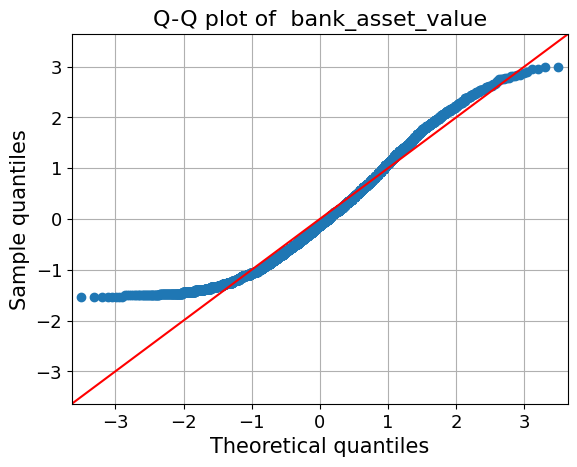

In [ ]:
#checking Q-Q PLots for numeric variables
from statsmodels.graphics.gofplots import qqplot
data_norm=df[['loan_id', ' no_of_dependents',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value']]
for c in data_norm.columns[:]:
  plt.figure(figsize=(8,5))
  fig=qqplot(data_norm[c],line='45',fit='True')
  plt.xticks(fontsize=13)
  plt.yticks(fontsize=13)
  plt.xlabel("Theoretical quantiles",fontsize=15)
  plt.ylabel("Sample quantiles",fontsize=15)
  plt.title("Q-Q plot of {}".format(c),fontsize=16)
  plt.grid(True)
  plt.show()

## A3) Below I have have demonstrated distributions for all features used for prediction


In [ ]:
!pip install fitter


2024-01-30 04:04:54.521 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted norm distribution with error=63.709858)
2024-01-30 04:04:54.956 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=63.710133)
2024-01-30 04:04:55.004 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted expon distribution with error=63.395668)
2024-01-30 04:04:55.473 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted lognorm distribution with error=66.380155)
2024-01-30 04:04:56.296 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted chi2 distribution with error=62.915381)
2024-01-30 04:04:56.330 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=62.745364)
2024-01-30 04:04:56.609 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted exponpow distribution with error=60.375057)


          sumsquare_error         aic         bic  kl_div  ks_statistic  \
exponpow        60.375057  417.603725  436.681130     inf      0.355994   
uniform         62.745364  325.887582  338.605852     inf      0.166784   
chi2            62.915381  395.560210  414.637615     inf      0.248698   
expon           63.395668  387.258173  399.976443     inf      0.220802   
norm            63.709858  365.853746  378.572016     inf      0.145816   

              ks_pvalue  
exponpow   0.000000e+00  
uniform   2.921079e-104  
chi2      4.326707e-233  
expon     2.853273e-183  
norm       1.108574e-79  


Text(0.5, 0, 'no_of_dependents')

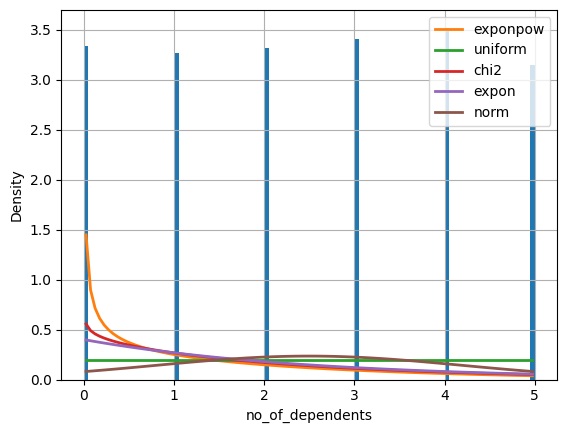

In [ ]:
# Plotting the distribution of no_of_dependents
no_of_dependents = df[" no_of_dependents"].values  # Corrected column name
f = Fitter(no_of_dependents, distributions=['norm', 'gamma', 'lognorm', 'expon', 'exponpow', 'chi2', 'uniform'])
f.fit()
print(f.summary())
plt.ylabel("Density")
plt.xlabel("no_of_dependents")


The distribution for no_of_dependents feature looks
like uniform distribution

2024-01-30 04:04:11.967 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted norm distribution with error=4e-05)
2024-01-30 04:04:12.064 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted lognorm distribution with error=4e-05)
2024-01-30 04:04:12.108 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted expon distribution with error=7.7e-05)
2024-01-30 04:04:12.538 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=4e-05)
2024-01-30 04:04:13.080 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted chi2 distribution with error=4e-05)
2024-01-30 04:04:13.102 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=5e-06)
2024-01-30 04:04:13.313 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted exponpow distribution with error=0.000309)


         sumsquare_error          aic          bic    kl_div  ks_statistic  \
uniform         0.000005  1283.385931  1296.104201  0.009461      0.007135   
chi2            0.000040  1321.355103  1340.432508  0.085277      0.073201   
norm            0.000040  1318.677139  1331.395408  0.085531      0.056909   
lognorm         0.000040  1320.677139  1339.754543  0.085531      0.056909   
gamma           0.000040  1320.677283  1339.754688  0.085547      0.056993   

            ks_pvalue  
uniform  9.805307e-01  
chi2     2.445239e-20  
norm     1.851941e-12  
lognorm  1.851822e-12  
gamma    1.705935e-12  


Text(0.5, 0, 'cibil_score')

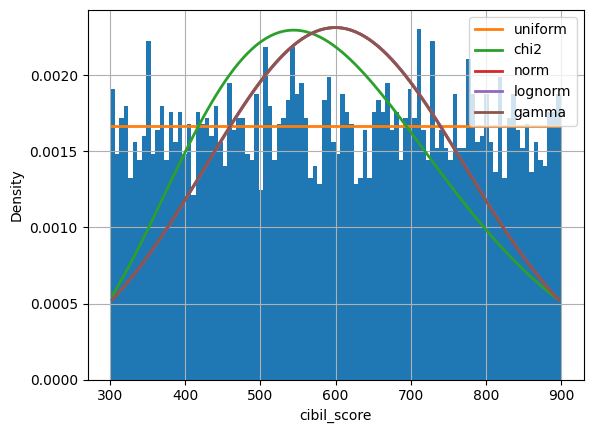

In [ ]:
# Plotting the distribution of cibil_score
cibil_score_data = df[" cibil_score"].values
f = Fitter(cibil_score_data, distributions=['norm', 'gamma', 'lognorm', 'expon', 'exponpow', 'chi2', 'uniform'])
f.fit()
print(f.summary())
plt.ylabel("Density")
plt.xlabel("cibil_score")


The distribution for cibil_score feature looks
like uniform distribution

2024-01-30 04:07:46.761 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted norm distribution with error=0.0)
2024-01-30 04:07:46.869 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted lognorm distribution with error=0.0)
2024-01-30 04:07:46.905 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted expon distribution with error=0.0)
2024-01-30 04:07:47.239 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=0.0)
2024-01-30 04:07:47.934 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted chi2 distribution with error=0.0)
2024-01-30 04:07:47.956 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=0.0)
2024-01-30 04:07:48.030 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted exponpow distribution with error=0.0)


         sumsquare_error          aic          bic  kl_div  ks_statistic  \
uniform     4.527470e-14  3221.527289  3234.245558     inf      0.012268   
norm        1.801588e-13  3256.816461  3269.534731     inf      0.064047   
lognorm     1.801589e-13  3258.816461  3277.893866     inf      0.064049   
gamma       1.802038e-13  3258.816682  3277.894086     inf      0.064442   
expon       3.158947e-13  3282.898206  3295.616475     inf      0.164437   

             ks_pvalue  
uniform   5.375135e-01  
norm      1.145869e-15  
lognorm   1.143555e-15  
gamma     7.423867e-16  
expon    2.423930e-101  


Text(0.5, 0, 'income_annum')

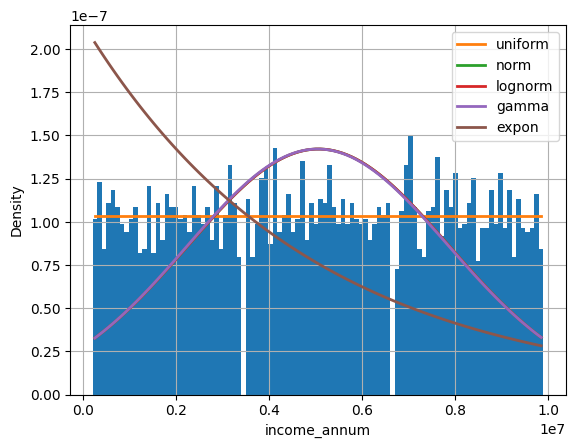

In [ ]:
# Plotting the distribution of income_annum
income_annum_data = df[" income_annum"].values
f = Fitter(income_annum_data, distributions=['norm', 'gamma', 'lognorm', 'expon', 'exponpow', 'chi2', 'uniform'])
f.fit()
print(f.summary())
plt.ylabel("Density")
plt.xlabel("income_annum")


It looks like uniform distribution

2024-01-30 04:08:37.139 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted norm distribution with error=2.850484)
2024-01-30 04:08:37.231 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted lognorm distribution with error=2.821143)
2024-01-30 04:08:37.279 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted expon distribution with error=2.850716)
2024-01-30 04:08:37.642 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=2.850427)
2024-01-30 04:08:38.262 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted chi2 distribution with error=2.849922)
2024-01-30 04:08:38.290 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=2.792158)
2024-01-30 04:08:38.432 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted exponpow distribution with error=2.944082)


         sumsquare_error          aic          bic  kl_div  ks_statistic  \
uniform         2.792158   582.074352   594.792621     inf      0.096275   
lognorm         2.821143  1057.835100  1076.912504     inf      0.482765   
chi2            2.849922   621.462217   640.539622     inf      0.111263   
gamma           2.850427   621.057838   640.135242     inf      0.118304   
norm            2.850484   619.056402   631.774672     inf      0.118801   

            ks_pvalue  
uniform  6.828721e-35  
lognorm  0.000000e+00  
chi2     1.740196e-46  
gamma    1.622444e-52  
norm     5.885704e-53  


Text(0.5, 0, 'loan_term')

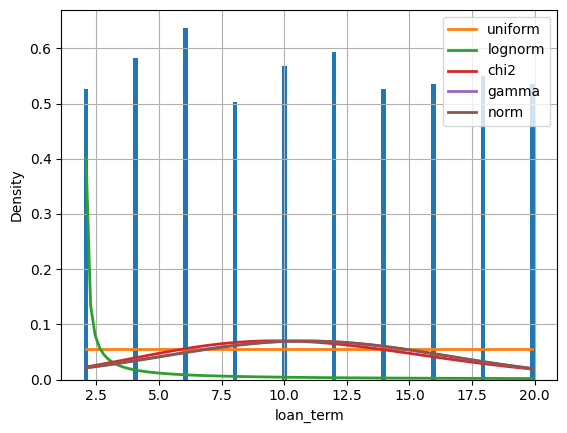

In [ ]:
# Plotting the distribution of loan_term
loan_term_data = df[" loan_term"].values
f = Fitter(loan_term_data, distributions=['norm', 'gamma', 'lognorm', 'expon', 'exponpow', 'chi2', 'uniform'])
f.fit()
print(f.summary())
plt.ylabel("Density")
plt.xlabel("loan_term")


It looks like uniform distribution

2024-01-30 04:09:51.173 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted norm distribution with error=0.0)
2024-01-30 04:09:51.421 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=0.0)
2024-01-30 04:09:51.465 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted expon distribution with error=0.0)
2024-01-30 04:09:52.214 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted lognorm distribution with error=0.0)
2024-01-30 04:09:52.688 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted chi2 distribution with error=0.0)
2024-01-30 04:09:52.719 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=0.0)
2024-01-30 04:09:52.728 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted exponpow distribution with error=0.0)


          sumsquare_error          aic          bic  kl_div  ks_statistic  \
expon        5.300974e-15  3557.609719  3570.327988     inf      0.042172   
gamma        5.411882e-15  3559.696086  3578.773491     inf      0.040986   
exponpow     8.500434e-15  3522.212422  3541.289826     inf      0.060081   
chi2         6.151379e-14  3611.611735  3630.689140     inf      0.119562   
norm         6.227266e-14  3610.128960  3622.847230     inf      0.122110   

             ks_pvalue  
expon     4.921230e-07  
gamma     1.143653e-06  
exponpow  7.740302e-14  
chi2      1.240285e-53  
norm      6.224141e-56  


Text(0.5, 0, 'residential_assets_value')

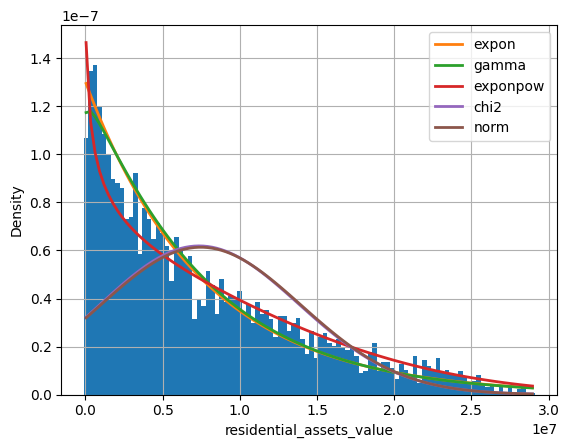

In [ ]:
# Plotting the distribution of residential_assets_value
residential_assets_data = df[" residential_assets_value"].values
f = Fitter(residential_assets_data, distributions=['norm', 'gamma', 'lognorm', 'expon', 'exponpow', 'chi2', 'uniform'])
f.fit()
print(f.summary())
plt.ylabel("Density")
plt.xlabel("residential_assets_value")


The distribution of residential_Asset_value looks like expon or gamma

2024-01-30 04:10:48.717 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted norm distribution with error=0.0)
2024-01-30 04:10:49.285 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=0.0)
2024-01-30 04:10:49.331 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted expon distribution with error=0.0)
2024-01-30 04:10:49.460 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted lognorm distribution with error=0.0)
2024-01-30 04:10:50.205 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted chi2 distribution with error=0.0)
2024-01-30 04:10:50.235 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=0.0)
2024-01-30 04:10:50.515 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted exponpow distribution with error=0.0)


          sumsquare_error          aic          bic  kl_div  ks_statistic  \
exponpow     1.604994e-14  3441.806410  3460.883815     inf      0.053592   
expon        2.002126e-14  3478.007406  3490.725676     inf      0.040421   
gamma        3.727839e-14  3527.182155  3546.259559     inf      0.120719   
chi2         1.709635e-13  3526.981664  3546.059068     inf      0.125712   
norm         1.729618e-13  3525.539800  3538.258069     inf      0.128557   

             ks_pvalue  
exponpow  4.260847e-11  
expon     1.695027e-06  
gamma     1.136318e-54  
chi2      2.886533e-59  
norm      5.721476e-62  


Text(0.5, 0, 'commercial_assets_value')

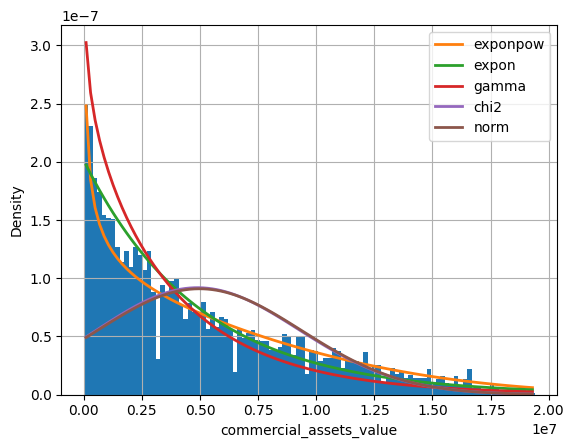

In [ ]:
# Plotting the distribution of commercial_assets_value
commercial_assets_data = df[" commercial_assets_value"].values
f = Fitter(commercial_assets_data, distributions=['norm', 'gamma', 'lognorm', 'expon', 'exponpow', 'chi2', 'uniform'])
f.fit()
print(f.summary())
plt.ylabel("Density")
plt.xlabel("commercial_assets_value")


The distribution for commercial_Assets_value looks like expon distribution

2024-01-30 04:11:29.694 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted norm distribution with error=0.0)
2024-01-30 04:11:29.844 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted lognorm distribution with error=0.0)
2024-01-30 04:11:29.922 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted expon distribution with error=0.0)
2024-01-30 04:11:30.455 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=0.0)
2024-01-30 04:11:30.997 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted chi2 distribution with error=0.0)
2024-01-30 04:11:31.027 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=0.0)
2024-01-30 04:11:31.055 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted exponpow distribution with error=0.0)


         sumsquare_error          aic          bic    kl_div  ks_statistic  \
gamma       7.048979e-15  3559.133052  3578.210457  0.049002      0.057335   
lognorm     7.248714e-15  3563.250542  3582.327947  0.050541      0.047117   
norm        7.544380e-15  3570.577081  3583.295350  0.054127      0.055408   
chi2        1.098088e-14  3578.311792  3597.389197  0.079376      0.099065   
uniform     1.630015e-14  3499.300962  3512.019231  0.228852      0.210135   

             ks_pvalue  
gamma     1.221143e-12  
lognorm   1.126790e-08  
norm      7.835267e-12  
chi2      6.370839e-37  
uniform  7.392699e-166  


Text(0.5, 0, 'luxury_assets_value')

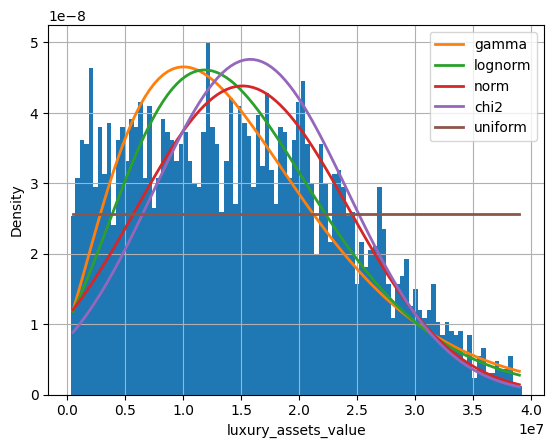

In [ ]:
# Plotting the distribution of luxury_assets_value
luxury_assets_data = df[" luxury_assets_value"].values
f = Fitter(luxury_assets_data, distributions=['norm', 'gamma', 'lognorm', 'expon', 'exponpow', 'chi2', 'uniform'])
f.fit()
print(f.summary())
plt.ylabel("Density")
plt.xlabel("luxury_assets_value")


2024-01-30 04:12:00.408 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted norm distribution with error=0.0)
2024-01-30 04:12:00.773 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=0.0)
2024-01-30 04:12:00.812 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted expon distribution with error=0.0)
2024-01-30 04:12:01.593 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted lognorm distribution with error=0.0)
2024-01-30 04:12:01.863 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted exponpow distribution with error=0.0)
2024-01-30 04:12:01.883 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=0.0)
2024-01-30 04:12:01.965 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted chi2 distribution with error=0.0)


         sumsquare_error          aic          bic  kl_div  ks_statistic  \
gamma       9.105307e-14  3381.572619  3400.650024     inf      0.049972   
norm        1.154009e-13  3410.430148  3423.148417     inf      0.064854   
expon       1.628721e-13  3383.432115  3396.150385     inf      0.137334   
uniform     2.291901e-13  3304.671610  3317.389880     inf      0.274982   
lognorm     6.622147e-13  4181.194309  4200.271713     inf      0.951786   

             ks_pvalue  
gamma     1.052718e-09  
norm      4.702629e-16  
expon     1.080346e-70  
uniform  8.740459e-286  
lognorm   0.000000e+00  


Text(0.5, 0, 'bank_asset_value')

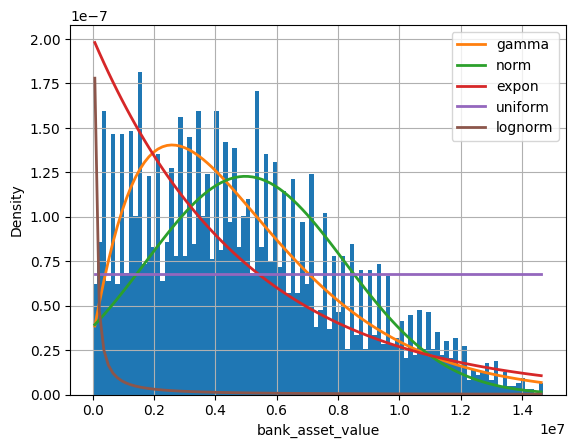

In [ ]:
# Plotting the distribution of bank_asset_value
bank_asset_data = df[" bank_asset_value"].values
f = Fitter(bank_asset_data, distributions=['norm', 'gamma', 'lognorm', 'expon', 'exponpow', 'chi2', 'uniform'])
f.fit()
print(f.summary())
plt.ylabel("Density")
plt.xlabel("bank_asset_value")


The distribution for bank_asset_value looks close to gamma or norm

<Axes: >

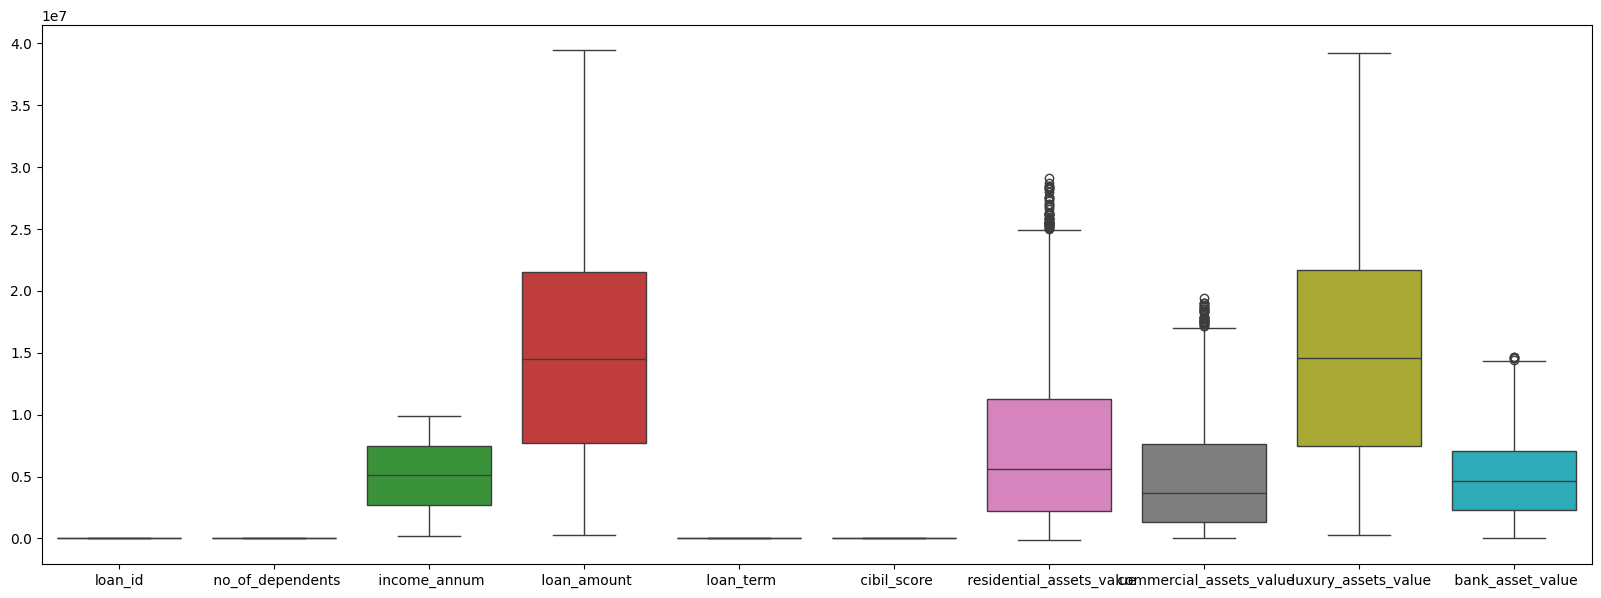

In [ ]:
plt.figure(figsize=(20, 7))
sns.boxplot(data=df)

In [ ]:
# Statistical Summary of Training Dataset
df.describe()

loan_id   no_of_dependents   income_annum   loan_amount  \
count  4269.000000        4269.000000   4.269000e+03  4.269000e+03   
mean   2135.000000           2.498712   5.059124e+06  1.513345e+07   
std    1232.498479           1.695910   2.806840e+06  9.043363e+06   
min       1.000000           0.000000   2.000000e+05  3.000000e+05   
25%    1068.000000           1.000000   2.700000e+06  7.700000e+06   
50%    2135.000000           3.000000   5.100000e+06  1.450000e+07   
75%    3202.000000           4.000000   7.500000e+06  2.150000e+07   
max    4269.000000           5.000000   9.900000e+06  3.950000e+07   

         loan_term   cibil_score   residential_assets_value  \
count  4269.000000   4269.000000               4.269000e+03   
mean     10.900445    599.936051               7.472617e+06   
std       5.709187    172.430401               6.503637e+06   
min       2.000000    300.000000              -1.000000e+05   
25%       6.000000    453.000000               2.200000e+06   
50%      10.000000    600.000000               5.600000e+06   
75%      16.000000    748.000000               1.130000e+07   
max      20.000000    900.000000               2.910000e+07   

        commercial_assets_value   luxury_assets_value   bank_asset_value  
count              4.269000e+03          4.269000e+03       4.269000e+03  
mean               4.973155e+06          1.512631e+07       4.976692e+06  
std                4.388966e+06          9.103754e+06       3.250185e+06  
min                0.000000e+00          3.000000e+05       0.000000e+00  
25%                1.300000e+06          7.500000e+06       2.300000e+06  
50%                3.700000e+06          1.460000e+07       4.600000e+06  
75%                7.600000e+06          2.170000e+07       7.100000e+06  
max                1.940000e+07          3.920000e+07       1.470000e+07

In [ ]:
#Range of each column
df.max() - df.min()

loan_id                         4268
no_of_dependents                   5
education                          1
self_employed                      1
income_annum                 9700000
loan_amount                 39200000
loan_term                         18
cibil_score                      600
residential_assets_value    29200000
commercial_assets_value     19400000
luxury_assets_value         38900000
bank_asset_value            14700000
loan_status                        1
dtype: int64

## Q9) Do the ranges of the predictor variables make sense?

#### loan_id:
The loan_id ranges from 1 to 4269, indicating unique identifiers for each loan application.
No specific inferences can be made about outliers or trends based on loan_id.

#### no_of_dependents:
The variable 'no_of_dependents' has a range from 0 to 5.
The mean is approximately 2.5, indicating an average number of dependents.
There are no negative values, suggesting valid data.
Most loans have a low to moderate number of dependents based on the 25th, 50th (median), and 75th percentiles.

#### income_annum:
The income_annum ranges from 200,000 to 9,700,000.
The mean income_annum is around 5,059,124.
The distribution of income_annum seems wide, with a large standard deviation.
Most incomes fall within the interquartile range (25th to 75th percentiles).

#### loan_amount:
The loan_amount ranges from 300,000 to 39,200,000.
The mean loan_amount is approximately 15,133,450.
The distribution of loan_amount also appears wide, with a large standard deviation.
Most loan amounts fall within the interquartile range.

#### loan_term:
Loan terms range from 2 to 20 years, with an average of around 10.9 years.
Most loans have terms between 6 and 16 years, based on percentiles.

#### cibil_score:
CIBIL scores range from 300 to 900.
The mean cibil_score is around 599.94.
The distribution of cibil_score seems to be centered around the mean.

#### residential_assets_value, commercial_assets_value, luxury_assets_value, bank_asset_value:
The values for these assets range from negative to positive.
It's unusual to have negative values for assets; further investigation is needed to understand this.

#### loan_status:
Loan_status is categorical, indicating whether a loan is approved or denied.
There are two unique values: 0 and 1, possibly denoting binary categories.

## Q4) Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)

In [ ]:
# Selecting only numeric features
numeric_df = df.select_dtypes(include=['float64', 'int64'])

In [ ]:
#Assessing the correlation among all the variables in the dataset
correlation_matrix = numeric_df.corr()
# Printing the correlation matrix to display the correlation between features
print(correlation_matrix)

                            loan_id   no_of_dependents   income_annum  \
loan_id                    1.000000           0.005326       0.012592   
 no_of_dependents          0.005326           1.000000       0.007266   
 income_annum              0.012592           0.007266       1.000000   
 loan_amount               0.008170          -0.003366       0.927470   
 loan_term                 0.009809          -0.020111       0.011488   
 cibil_score               0.016323          -0.009998      -0.023034   
 residential_assets_value  0.020936           0.007376       0.636841   
 commercial_assets_value   0.018595          -0.001531       0.640328   
 luxury_assets_value      -0.000862           0.002817       0.929145   
 bank_asset_value          0.010765           0.011163       0.851093   

                            loan_amount   loan_term   cibil_score  \
loan_id                        0.008170    0.009809      0.016323   
 no_of_dependents             -0.003366   -0.020111     -0

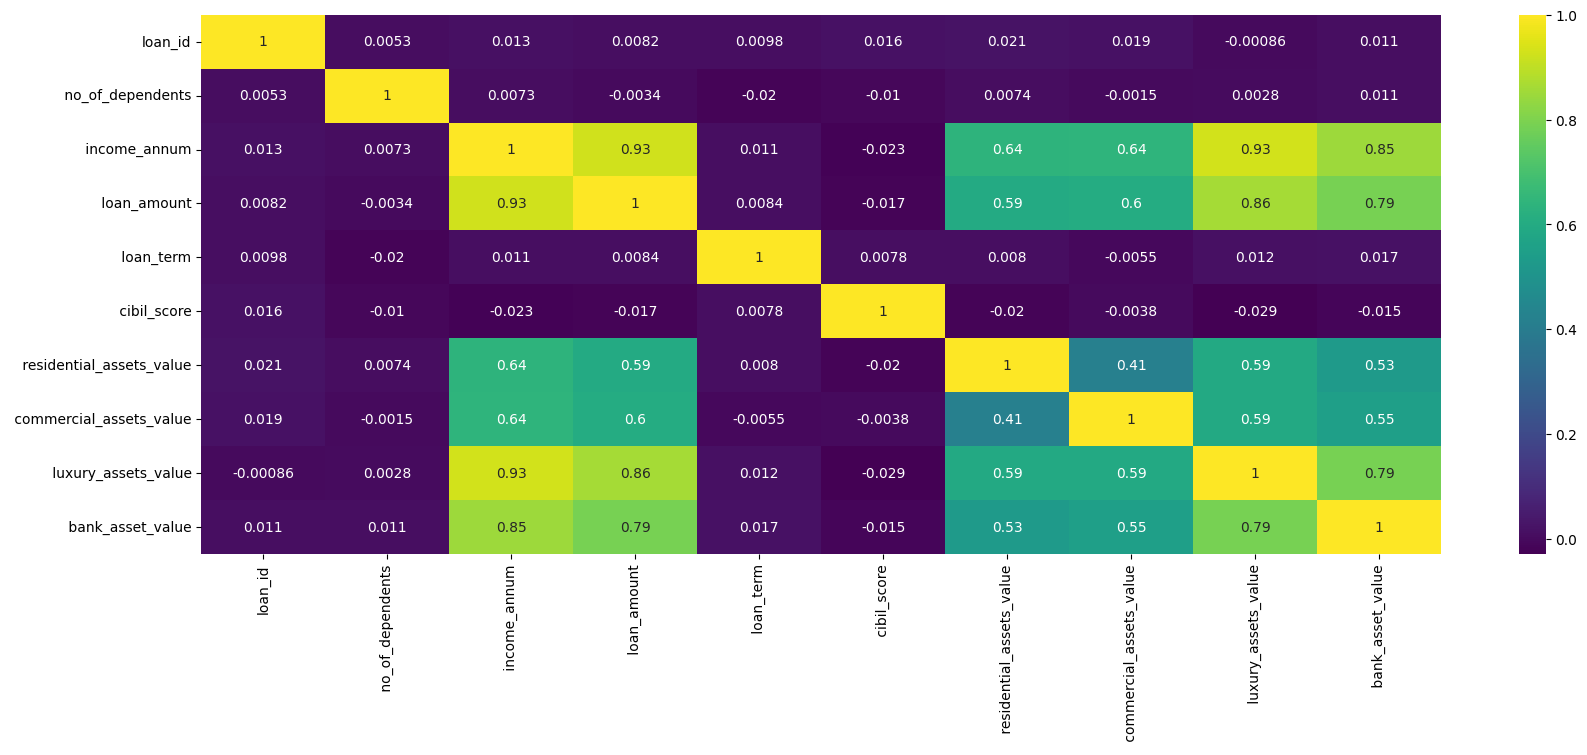

In [ ]:

# Selecting only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

#heatmap of the correlation
plt.figure(figsize=(20, 7))
sns.heatmap(numeric_df.corr(), annot=True, cmap="viridis")
plt.show()


### A4) There is a noticeable correlation among the variables, with the highest correlation observed between luxury_asset_value and income_annum & loan_amount and income_annum. This could imply that these variables are essentially measuring or predicting the same underlying aspect.

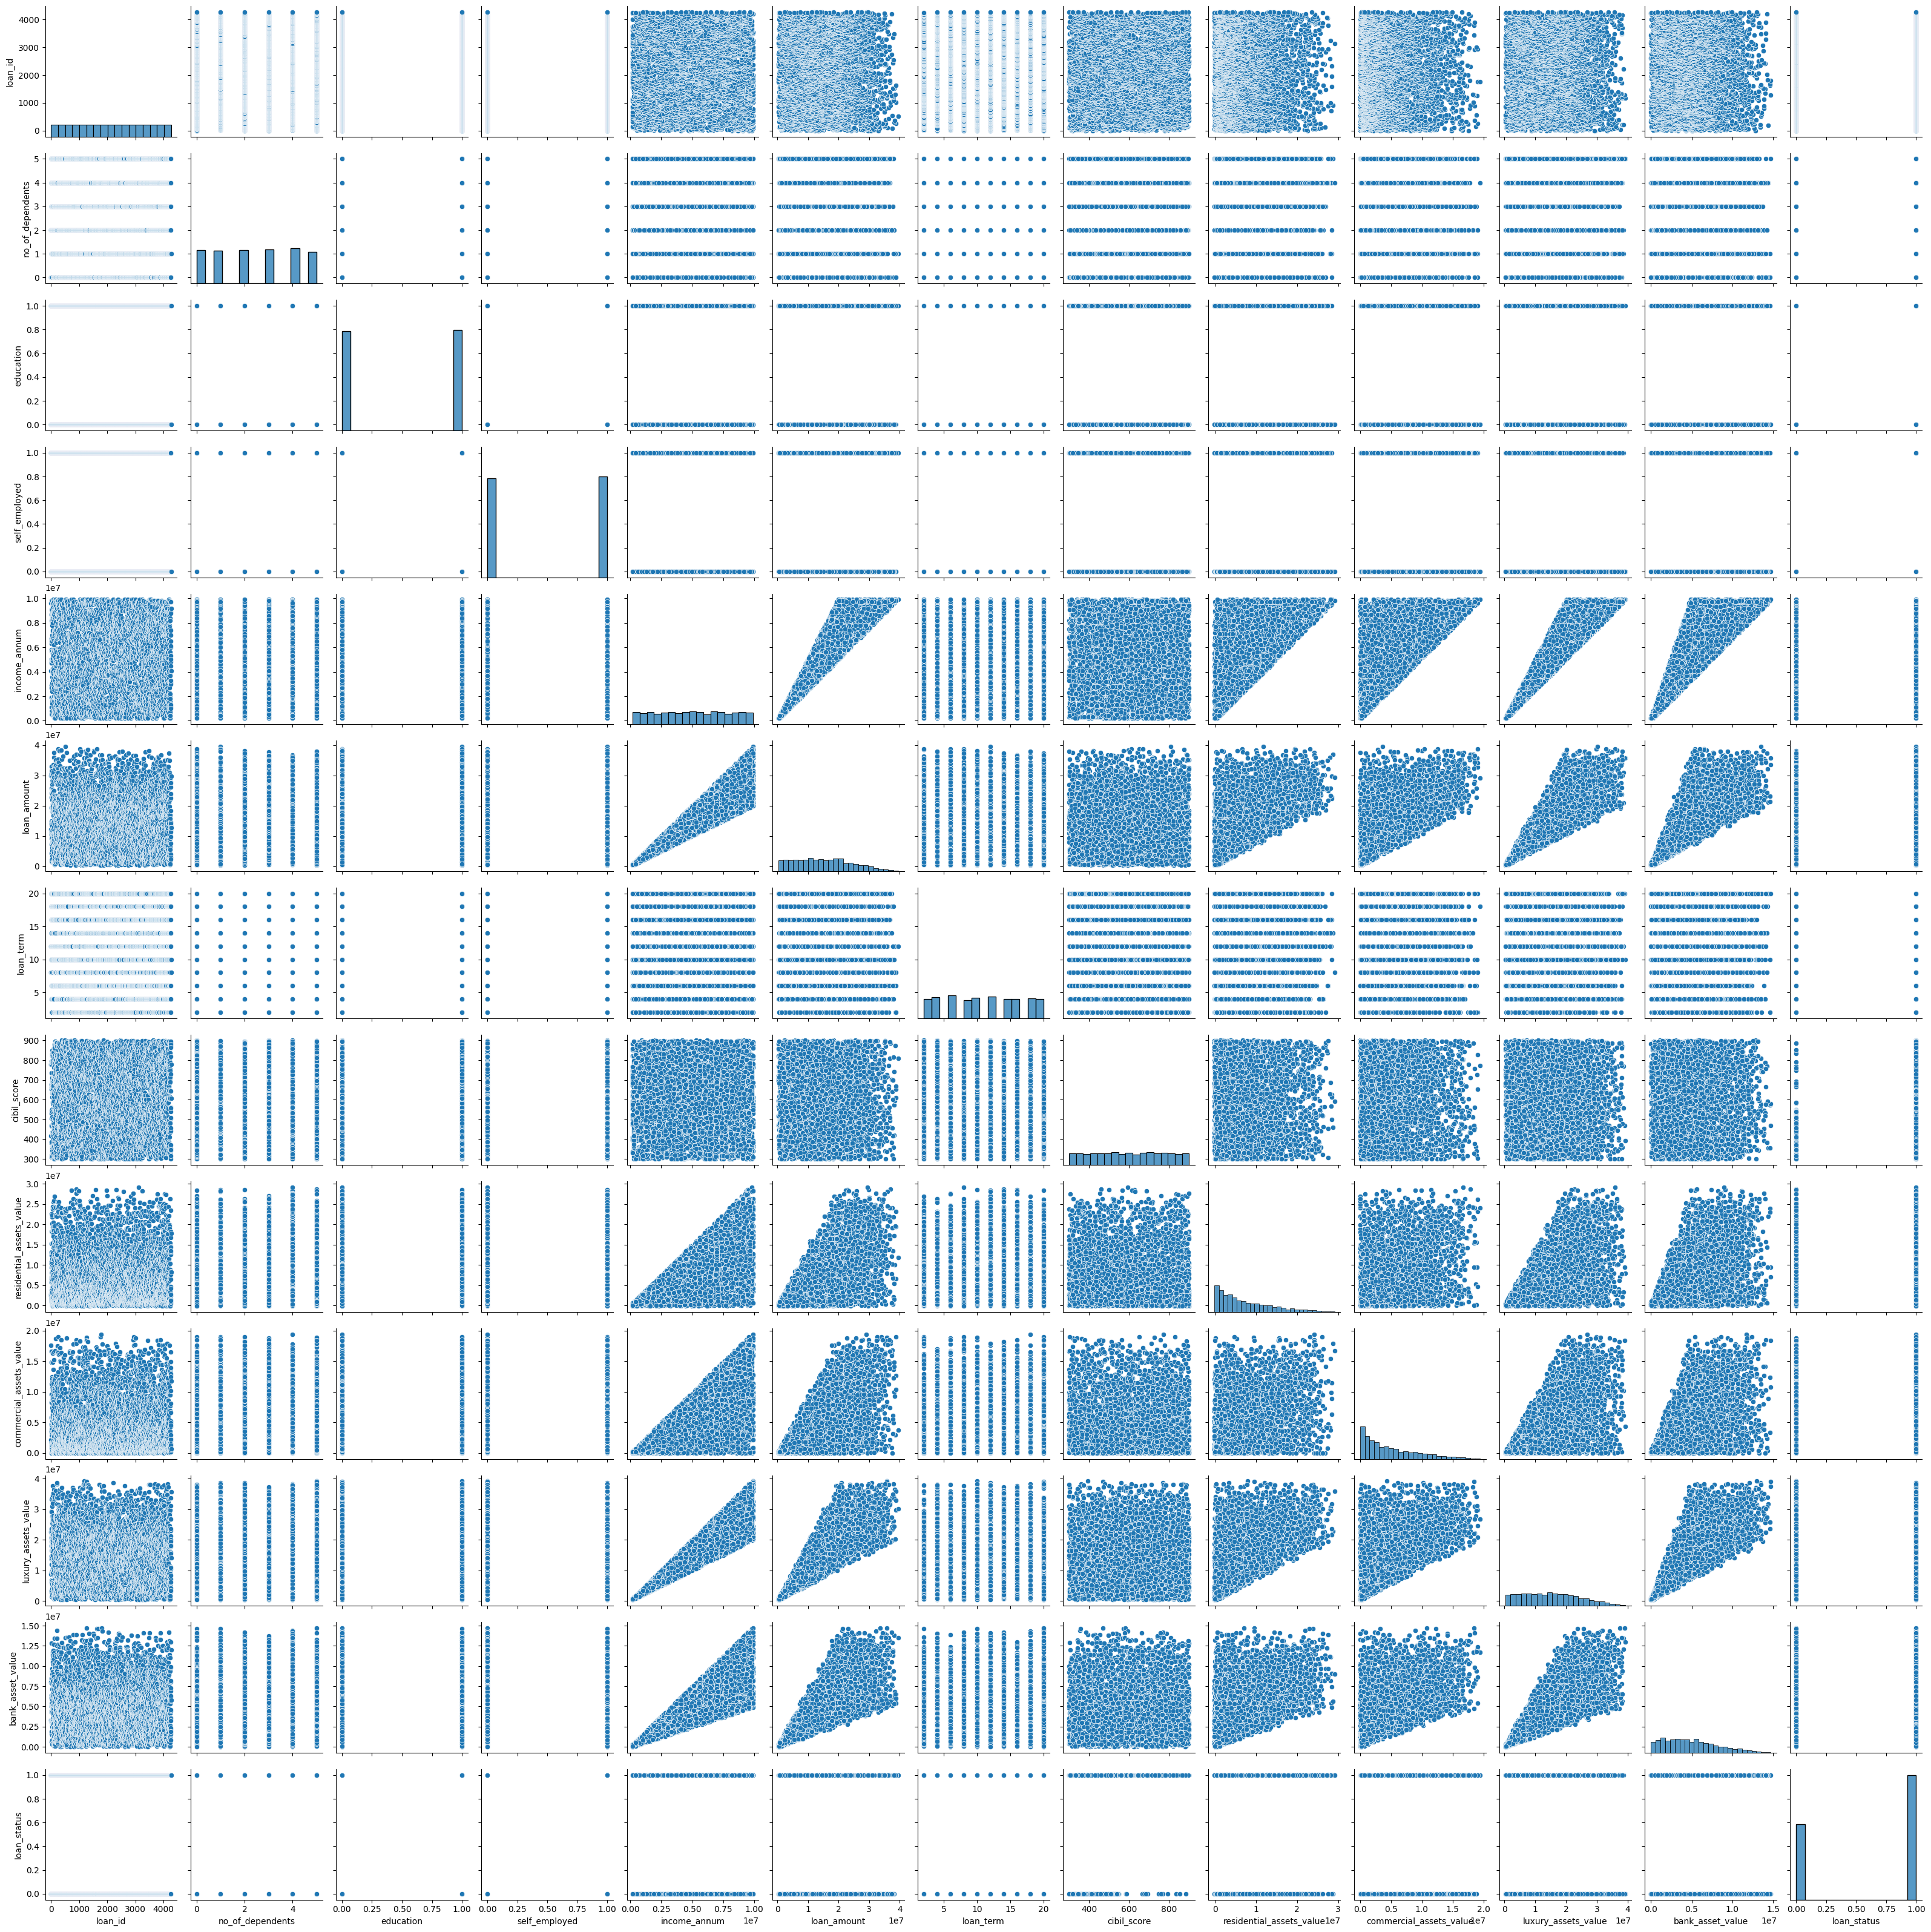

In [ ]:
#Utilizing a pair plot to examine collinearity among variables.
sns.pairplot(df)
plt.show()

### A4 and A7) The analysis of the correlation matrix and heatmap indicates the existence of multicollinearity among the independent variables. Notably, the strongest correlations are observed between luxury_asset_value and income_annum, as well as between loan_amount and income_annum. If two variables are highly correlated, removing one of them might help in reducing multicollinearity. However, on further assessment we observe that all of these column although directly related will be important in predicting the target variable and affect the model performance which is why we need to retain these columns

In [ ]:
df.dtypes

loan_id                       int64
 no_of_dependents             int64
 education                   object
 self_employed               object
 income_annum                 int64
 loan_amount                  int64
 loan_term                    int64
 cibil_score                  int64
 residential_assets_value     int64
 commercial_assets_value      int64
 luxury_assets_value          int64
 bank_asset_value             int64
 loan_status                 object
dtype: object

In [ ]:
print(df.columns)


Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')


In [ ]:
# Converting 'education' to numerical values
df[' education'] = df[' education'].map({' Graduate': 1, ' Not Graduate': 0})

# Converting 'self_employed' to numerical values
df[' self_employed'] = df[' self_employed'].map({' Yes': 1, ' No': 0})

# Converting 'loan_status' to numerical values
df[' loan_status'] = df[' loan_status'].map({' Approved': 1, ' Rejected': 0})


In [ ]:
df.dtypes

loan_id                      int64
 no_of_dependents            int64
 education                   int64
 self_employed               int64
 income_annum                int64
 loan_amount                 int64
 loan_term                   int64
 cibil_score                 int64
 residential_assets_value    int64
 commercial_assets_value     int64
 luxury_assets_value         int64
 bank_asset_value            int64
 loan_status                 int64
dtype: object

In [ ]:
!pip install statsmodels

In [ ]:
# Utilising OLS for finding the p-value to check the significant features
import statsmodels.api as sm

features = [
    "loan_id",
    "no_of_dependents",
    "education",
    "self_employed",
    "income_annum",
    "loan_amount",
    "loan_term",
    "cibil_score",
    "residential_assets_value",
    "commercial_assets_value",
    "luxury_assets_value",
    "bank_asset_value",
]

df.columns = df.columns.str.strip()

# OLS model
model = sm.OLS(
    df["loan_status"],
    df[features],
).fit()

print(model.summary())


                                 OLS Regression Results                                
Dep. Variable:            loan_status   R-squared (uncentered):                   0.834
Model:                            OLS   Adj. R-squared (uncentered):              0.834
Method:                 Least Squares   F-statistic:                              1787.
Date:                Tue, 30 Jan 2024   Prob (F-statistic):                        0.00
Time:                        03:05:28   Log-Likelihood:                         -1206.7
No. Observations:                4269   AIC:                                      2437.
Df Residuals:                    4257   BIC:                                      2514.
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

## Q8) Which predictor variables are the most important?

### A4 and A8) From the above graphs we can make out that 'loan_id','no_of_dependents','education','self_employed','income_annum','loan_amount','loan_term','cibil_score' all have p-values as 0 and hence are significant features. We can also tell that 'residential_assets_value ', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value' are comparatively less significant because they have p-values greater than 0.05 with 'residential_assets_value' as the least significant.
### From the OLS regression results we also understand that the following predictor variables have relatively larger absolute coefficients, indicating higher importance:

### cibil_score: The coefficient for cibil_score is 0.0017, suggesting a significant impact on the loan_status.
### loan_term: The coefficient for loan_term is -0.0171, indicating its importance in predicting the loan_status.
### loan_amount: The coefficient for loan_amount is 9.952e-09, suggesting a non-negligible impact.

## Q6) Do the training and test sets have the same data?

In [ ]:
#splitting the dataset into training set, validation set and test set
from sklearn.model_selection import train_test_split

X = df[
    [
       "loan_id",
    "no_of_dependents",
    "education",
    "self_employed",
    "income_annum",
    "loan_amount",
    "loan_term",
    "cibil_score",
    "residential_assets_value",
    "commercial_assets_value",
    "luxury_assets_value",
    "bank_asset_value",
    ]
]

y = df["loan_status"]

# Spliting data into Training 75%, Validation set 15% and Test set 10%

X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(
    X_t, y_t, test_size=0.15, random_state=1
)



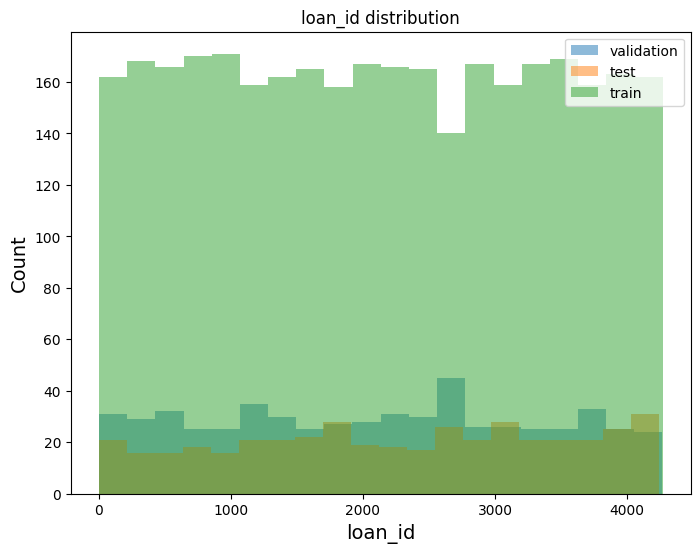

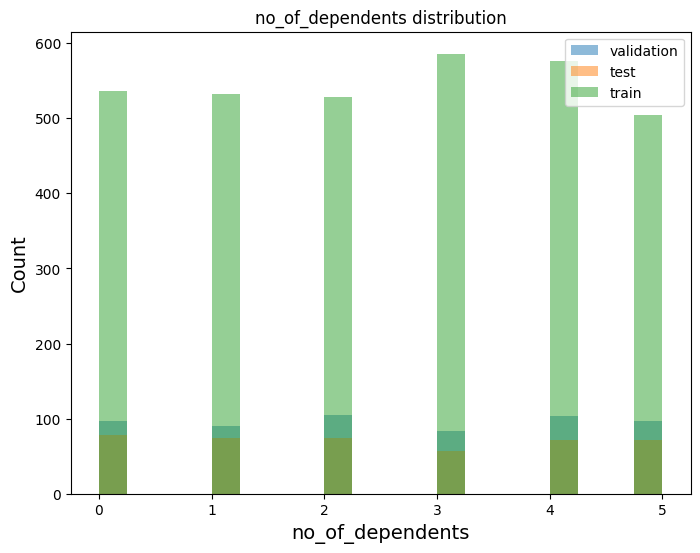

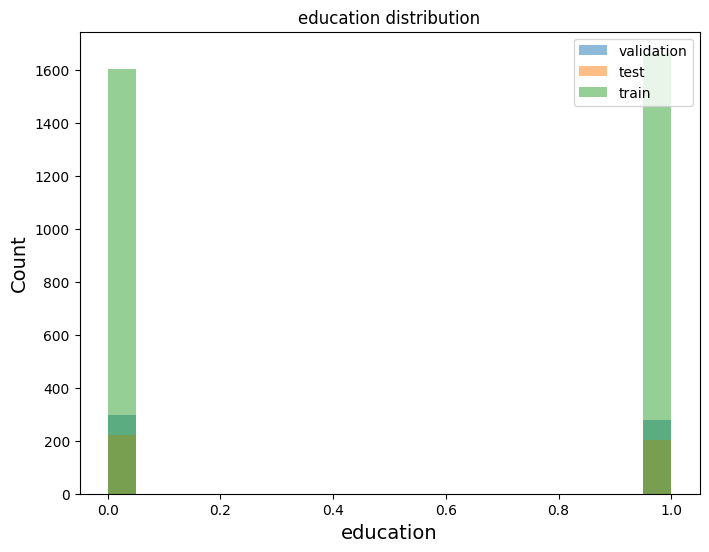

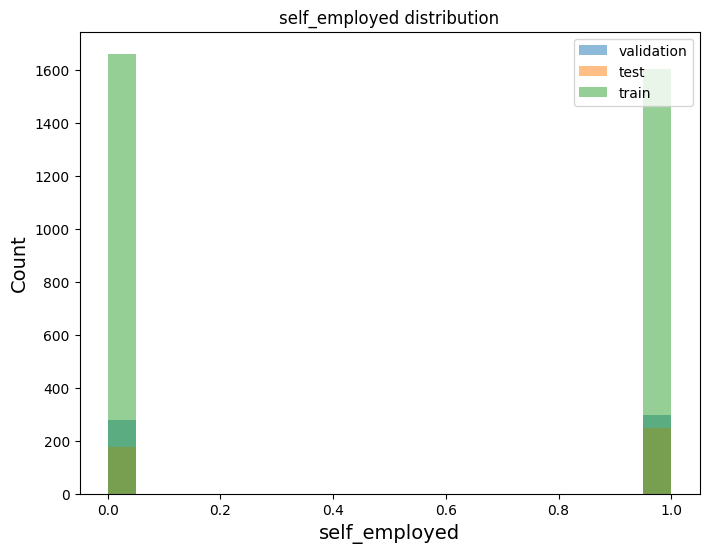

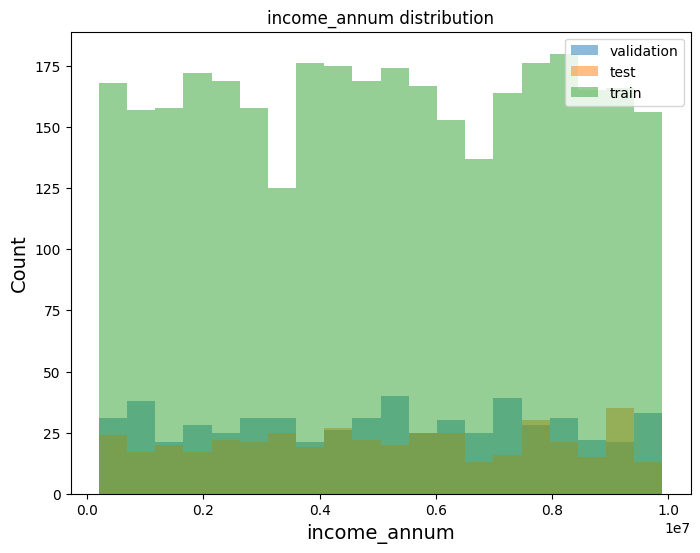

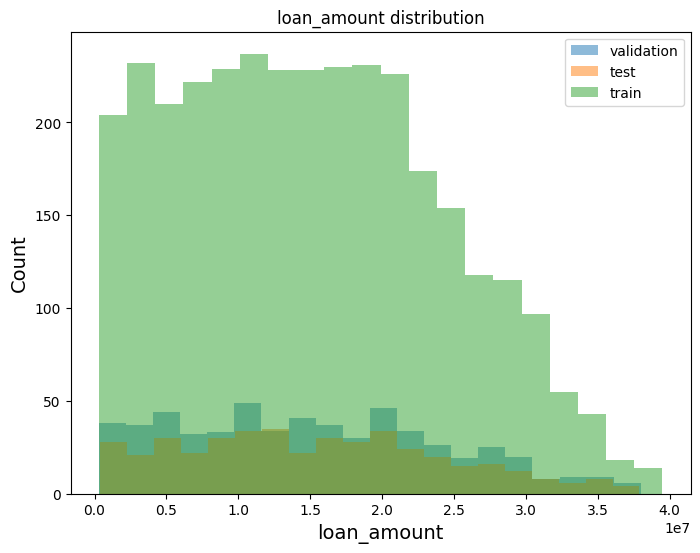

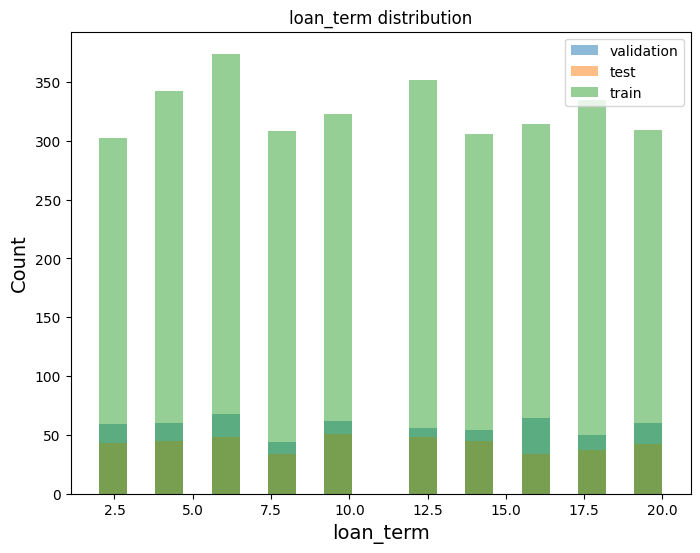

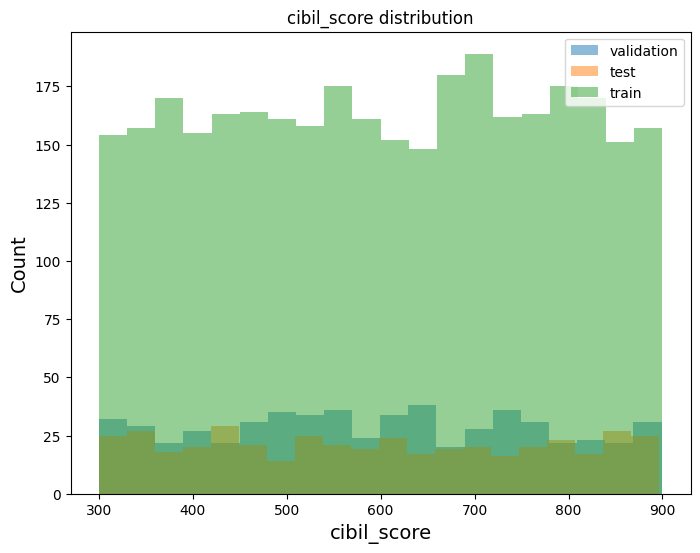

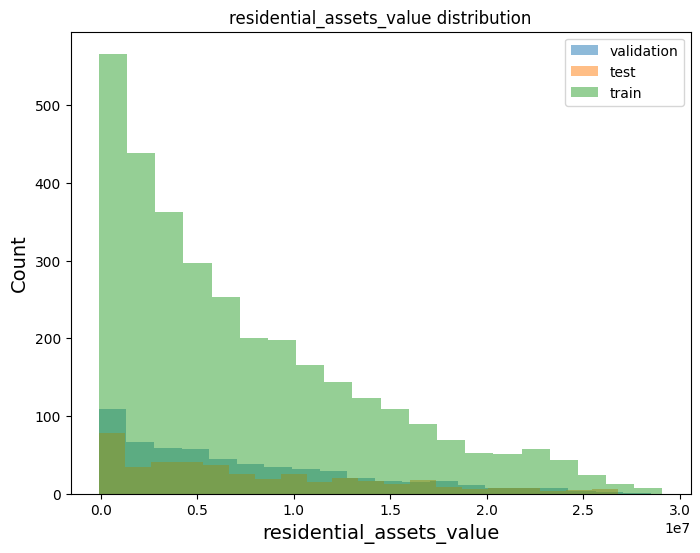

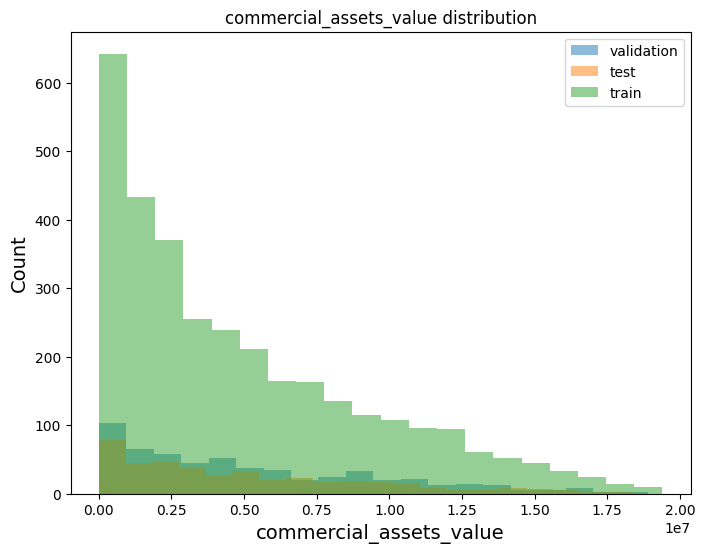

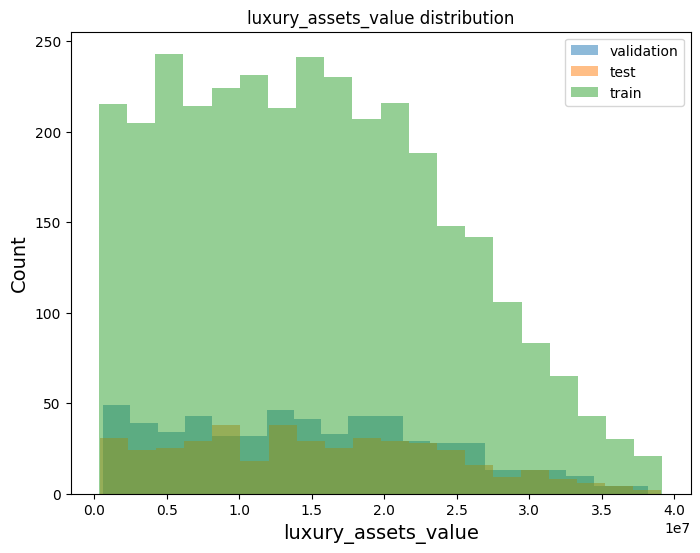

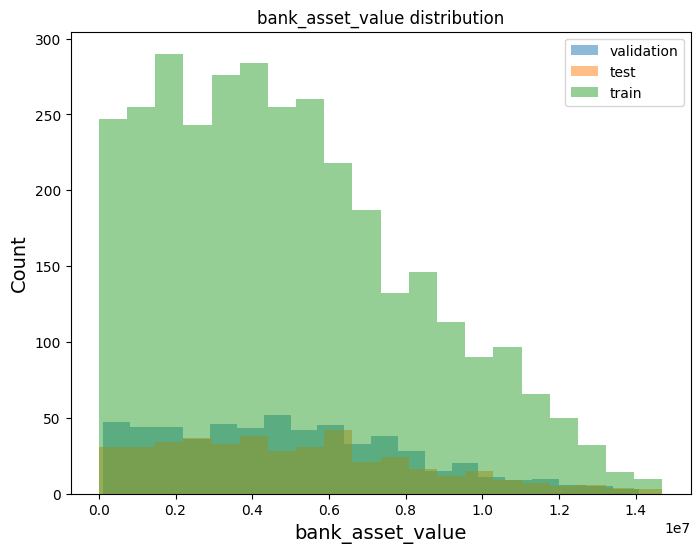

In [ ]:
# Looking the data for test, training, and validation set
X_test_plot = X_test[
    [
        "loan_id",
        "no_of_dependents",
        "education",
        "self_employed",
        "income_annum",
        "loan_amount",
        "loan_term",
        "cibil_score",
        "residential_assets_value",
        "commercial_assets_value",
        "luxury_assets_value",
        "bank_asset_value",
    ]
]

X_val_plot = X_val[
    [
        "loan_id",
        "no_of_dependents",
        "education",
        "self_employed",
        "income_annum",
        "loan_amount",
        "loan_term",
        "cibil_score",
        "residential_assets_value",
        "commercial_assets_value",
        "luxury_assets_value",
        "bank_asset_value",
    ]
]

X_train_plot = X_train[
    [
        "loan_id",
        "no_of_dependents",
        "education",
        "self_employed",
        "income_annum",
        "loan_amount",
        "loan_term",
        "cibil_score",
        "residential_assets_value",
        "commercial_assets_value",
        "luxury_assets_value",
        "bank_asset_value",
    ]
]

# Plotting the data to see the histogram
for c in X_test_plot.columns[:]:
    plt.figure(figsize=(8, 6))
    plt.hist(X_val_plot[c], bins=20, alpha=0.5, label="validation")
    plt.hist(X_test_plot[c], bins=20, alpha=0.5, label="test")
    plt.hist(X_train_plot[c], bins=20, alpha=0.5, label="train")
    plt.xlabel(c, size=14)
    plt.ylabel("Count", size=14)
    plt.legend(loc="upper right")
    plt.title("{} distribution".format(c))
    plt.show()

### A6) Yes, the training and test sets are derived from the same dataset. The dataset is partitioned into a training set, which the model learns from, and test sets, used to evaluate the model's performance. This ensures that the model generalizes well to unseen data, providing a reliable assessment of its effectiveness. Hence, we can say that the data is the same for both training and test sets. Also, from above graphs its evident that the distributions are almost same for all train and test sets

In [ ]:
from scipy.stats import zscore

z_scores = zscore(df.select_dtypes(include=['int64', 'float64']))
df_no_outliers = df[(z_scores < 3).all(axis=1)]

In [ ]:
df.head()

loan_id  no_of_dependents  education  self_employed  income_annum  \
0        1                 2          1              0       9600000   
1        2                 0          0              1       4100000   
2        3                 3          1              0       9100000   
3        4                 3          1              0       8200000   
4        5                 5          0              1       9800000   

   loan_amount  loan_term  cibil_score  residential_assets_value  \
0     29900000         12          778                   2400000   
1     12200000          8          417                   2700000   
2     29700000         20          506                   7100000   
3     30700000          8          467                  18200000   
4     24200000         20          382                  12400000   

   commercial_assets_value  luxury_assets_value  bank_asset_value  loan_status  
0                 17600000             22700000           8000000            1  
1                  2200000              8800000           3300000            0  
2                  4500000             33300000          12800000            0  
3                  3300000             23300000           7900000            0  
4                  8200000             29400000           5000000            0

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
from tabulate import tabulate

target_variable = 'loan_status'

# List of features to exclude
features_to_exclude = ['loan_id']

# Defining features and target
X = df_no_outliers.drop([target_variable] + features_to_exclude, axis=1)
y = df_no_outliers[target_variable]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and training the logistic regression model
model_logistic = LogisticRegression()
model_logistic.fit(X_train, y_train)

# Making predictions on the testing set
y_pred = model_logistic.predict(X_test)

# Evaluate model performance
performance_metrics = [
    ["Accuracy", round(accuracy_score(y_test, y_pred), 2)],
    ["Precision", round(precision_score(y_test, y_pred), 2)],
    ["Recall", round(recall_score(y_test, y_pred), 2)],
    ["F1-score", round(f1_score(y_test, y_pred), 2)]
]

# Displaying performance metrics
print(tabulate(performance_metrics, headers=["Metrics", "Score"]))

# Replacing the values with my actual data
new_data_point = X.iloc[0, :].values.reshape(1, -1)
predicted_status = model_logistic.predict(new_data_point)

print("Predicted Loan Status:", predicted_status)


Metrics      Score
---------  -------
Accuracy      0.72
Precision     0.7
Recall        0.95
F1-score      0.8
Predicted Loan Status: [1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
#Implementing Logistic Regression using sklearn
modelLogistic = LogisticRegression()
modelLogistic.fit(X_train,y_train)

#printing the regression coefficients

print("The intercept b0= ", modelLogistic.intercept_)

print("The coefficient b1= ", modelLogistic.coef_)

The intercept b0=  [1.63597378e-06]
The coefficient b1=  [[ 3.24073810e-06  9.23909287e-07  6.58270145e-07 -4.77343991e-07
   4.47342078e-08  2.51410105e-06  4.02271616e-03 -9.46408517e-09
   1.12005420e-08  2.11700522e-08  6.03658955e-09]]


In [ ]:
lr_y_predict = modelLogistic.predict(X_test)

print("Model Performance with Test set")

d = [ ["Accuracy_score", f'{round(accuracy_score(y_test,lr_y_predict),2)}'],
     ["Precission_score", f'{round(precision_score(y_test,lr_y_predict),2)}'],
     ["Recall_score", f'{round(recall_score(y_test,lr_y_predict),2)}'],
     ["F1-score",f'{round(f1_score(y_test,lr_y_predict),2)}']]

print(tabulate(d, headers=["Metrics", "Score"]))

print("-----------------------------------------------")


Model Performance with Test set
Metrics             Score
----------------  -------
Accuracy_score       0.72
Precission_score     0.7
Recall_score         0.95
F1-score             0.8
-----------------------------------------------


In [ ]:
from sklearn.metrics import mean_squared_error

# Making predictions using the training set
y_pred_train = model_logistic.predict(X_train)
# The mean squared error for training set
print('Mean squared error on training set: %.2f' % mean_squared_error(y_train, y_pred_train))

# Making predictions using the testing set
y_pred_test = model_logistic.predict(X_test)
# The mean squared error for testing set
print('Mean squared error on testing set: %.2f' % mean_squared_error(y_test, y_pred_test))

# Accuracy on testing dataset
accuracy_on_testing_set = model_logistic.score(X_test, y_test)
print('Accuracy on testing dataset: {:.3f}'.format(accuracy_on_testing_set))


Mean squared error on training set: 0.26
Mean squared error on testing set: 0.28
Accuracy on testing dataset: 0.723


In [ ]:
independent_cols = [
    "loan_id",
    "no_of_dependents",
    "income_annum",
    "loan_amount",
    "loan_term",
    "cibil_score",
    "residential_assets_value",
    "commercial_assets_value",
    "luxury_assets_value",
    "bank_asset_value"
]

X_out = df[independent_cols]

y_out = df["loan_status"]

# Splitting train and test data
X_train_out, X_test_out, y_train_out, y_test_out = train_test_split(X_out, y_out, random_state=1, train_size=0.8)


In [ ]:
modelLogistic_out = LogisticRegression()
modelLogistic_out.fit(X_train_out,y_train_out)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
lr_y_predict_out = modelLogistic_out.predict(X_test_out)

print("Model Performance with Test set")

d = [ ["Accuracy_score", f'{round(accuracy_score(y_test_out,lr_y_predict_out),2)}'],
     ["Precission_score", f'{round(precision_score(y_test_out,lr_y_predict_out),2)}'],
     ["Recall_score", f'{round(recall_score(y_test_out,lr_y_predict_out),2)}'],
     ["F1-score",f'{round(f1_score(y_test_out,lr_y_predict_out),2)}']]

print(tabulate(d, headers=["Metrics", "Score"]))
print("-----------------------------------------------")

Model Performance with Test set
Metrics             Score
----------------  -------
Accuracy_score       0.74
Precission_score     0.73
Recall_score         0.91
F1-score             0.81
-----------------------------------------------


In [ ]:
# Checking for missing values in X_out
print("Missing values in X_out:")
print(X_out.isnull().sum())

# Checking the lengths of X_out and y_out
print("Length of X_out:", len(X_out))
print("Length of y_out:", len(y_out))


Missing values in X_out:
loan_id                     0
no_of_dependents            0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
dtype: int64
Length of X_out: 4269
Length of y_out: 4269


In [ ]:
print("Class distribution in y_out:")
print(y_out.value_counts())


Class distribution in y_out:
1    2656
0    1613
Name: loan_status, dtype: int64


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tabulate import tabulate



target_variable = 'loan_status'
features_to_exclude = ['loan_id']

# Defining features and target
X = df.drop([target_variable] + features_to_exclude, axis=1)
y = df[target_variable]

# Split the data into training and testing sets with outliers
X_train_with_outliers, X_test_with_outliers, y_train_with_outliers, y_test_with_outliers = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model with outliers
model_logistic_with_outliers = LogisticRegression()
model_logistic_with_outliers.fit(X_train_with_outliers, y_train_with_outliers)

# Make predictions on the testing set with outliers
y_pred_with_outliers = model_logistic_with_outliers.predict(X_test_with_outliers)

# Evaluate model performance with outliers
performance_metrics_with_outliers = [
    ["Accuracy (with outliers)", round(accuracy_score(y_test_with_outliers, y_pred_with_outliers), 2)],
    ["Precision (with outliers)", round(precision_score(y_test_with_outliers, y_pred_with_outliers), 2)],
    ["Recall (with outliers)", round(recall_score(y_test_with_outliers, y_pred_with_outliers), 2)],
    ["F1-score (with outliers)", round(f1_score(y_test_with_outliers, y_pred_with_outliers), 2)]
]

# Display performance metrics with outliers
print(tabulate(performance_metrics_with_outliers, headers=["Metrics", "Score"]))


# Define features and target without outlierstarget_variable = 'loan_status'
features_to_exclude = ['loan_id']

# Define features and target
X_no_outliers = df_no_outliers.drop([target_variable] + features_to_exclude, axis=1)
y_no_outliers = df_no_outliers[target_variable]

# Split the data into training and testing sets without outliers
X_train_no_outliers, X_test_no_outliers, y_train_no_outliers, y_test_no_outliers = train_test_split(X_no_outliers, y_no_outliers, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model without outliers
model_logistic_no_outliers = LogisticRegression()
model_logistic_no_outliers.fit(X_train_no_outliers, y_train_no_outliers)

# Make predictions on the testing set without outliers
y_pred_no_outliers = model_logistic_no_outliers.predict(X_test_no_outliers)

# Evaluate model performance without outliers
performance_metrics_no_outliers = [
    ["Accuracy (without outliers)", round(accuracy_score(y_test_no_outliers, y_pred_no_outliers), 2)],
    ["Precision (without outliers)", round(precision_score(y_test_no_outliers, y_pred_no_outliers), 2)],
    ["Recall (without outliers)", round(recall_score(y_test_no_outliers, y_pred_no_outliers), 2)],
    ["F1-score (without outliers)", round(f1_score(y_test_no_outliers, y_pred_no_outliers), 2)]
]

# Display performance metrics without outliers
print(tabulate(performance_metrics_no_outliers, headers=["Metrics", "Score"]))


Metrics                      Score
-------------------------  -------
Accuracy (with outliers)      0.63
Precision (with outliers)     0.63
Recall (with outliers)        1
F1-score (with outliers)      0.77
Metrics                         Score
----------------------------  -------
Accuracy (without outliers)      0.72
Precision (without outliers)     0.7
Recall (without outliers)        0.95
F1-score (without outliers)      0.8


In [ ]:
accuracy_with_outliers = 0.63
precision_with_outliers = 0.63
recall_with_outliers = 1
f1_score_with_outliers = 0.77

accuracy_without_outliers = 0.72
precision_without_outliers = 0.7
recall_without_outliers = 0.95
f1_score_without_outliers = 0.8

# Calculating percentage improvements
accuracy_improvement = ((accuracy_without_outliers - accuracy_with_outliers) / accuracy_with_outliers) * 100
precision_improvement = ((precision_without_outliers - precision_with_outliers) / precision_with_outliers) * 100
recall_improvement = ((recall_without_outliers - recall_with_outliers) / recall_with_outliers) * 100
f1_score_improvement = ((f1_score_without_outliers - f1_score_with_outliers) / f1_score_with_outliers) * 100

# Displaying improvements
print(f"Accuracy Improvement: {accuracy_improvement:.2f}%")
print(f"Precision Improvement: {precision_improvement:.2f}%")
print(f"Recall Improvement: {recall_improvement:.2f}%")
print(f"F1-score Improvement: {f1_score_improvement:.2f}%")


Accuracy Improvement: 14.29%
Precision Improvement: 11.11%
Recall Improvement: -5.00%
F1-score Improvement: 3.90%


#### A11) We can see the improvement in accuracy, precision and f1 score after removing outliers.

Q12)

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error

def null_impute_with_mean(percent, feature, impute_feature):
    df_null = df.copy()
    df_null[f"{impute_feature}"] = df_null[f"{feature}"]

    # Introducing missing values
    df_null.loc[df_null.sample(frac=percent).index, f'{impute_feature}'] = np.NaN

    # Imputing Null values with mean
    df_null[f"{impute_feature}"] = df_null[f"{impute_feature}"].fillna(df_null[f"{impute_feature}"].mean())

    # Calculating mean squared error
    mse = mean_squared_error(df_null[f"{feature}"], df_null[f"{impute_feature}"])

    # Calculating bias and variance
    expected_prediction = df_null[f"{feature}"].mean()
    bias_squared = (expected_prediction - df_null[f"{impute_feature}"]).mean()**2
    variance = ((df_null[f"{impute_feature}"] - expected_prediction)**2).mean()

    print(f"Error after imputing {percent * 100} values is {round(mse, 2) * 100}%")
    print(f"Bias^2: {bias_squared:.2f}")
    print(f"Variance: {variance:.2f}")
    print("\n")

# Removing 1% data and imputing
null_impute_with_mean(0.01 ,"loan_term" ,"loan_term_imputed")

# Removing 5% data and imputing with mean
null_impute_with_mean(0.05 ,"loan_term" ,"loan_term_imputed")

# Removing 10% data and imputing
null_impute_with_mean(0.10 ,"loan_term" ,"loan_term_imputed")


Error after imputing 1.0 values is 33.0%
Bias^2: 0.00
Variance: 32.26


Error after imputing 5.0 values is 145.0%
Bias^2: 0.00
Variance: 31.14


Error after imputing 10.0 values is 320.0%
Bias^2: 0.00
Variance: 29.39




In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error

def null_impute_with_median(percent, feature, impute_feature):
    df_null = df.copy()
    df_null[f"{impute_feature}"] = df_null[f"{feature}"]

    # Introducing missing values
    df_null.loc[df_null.sample(frac=percent).index, f'{impute_feature}'] = np.NaN

    # Imputing Null values with median
    df_null[f"{impute_feature}"] = df_null[f"{impute_feature}"].fillna(df_null[f"{impute_feature}"].median())

    # Calculating mean squared error
    mse = mean_squared_error(df_null[f"{feature}"], df_null[f"{impute_feature}"])

    # Calculating bias and variance
    expected_prediction = df_null[f"{feature}"].median()
    bias_squared = (expected_prediction - df_null[f"{impute_feature}"]).mean()**2
    variance = ((df_null[f"{impute_feature}"] - expected_prediction)**2).mean()

    print(f"Error after imputing {percent * 100} values is {round(mse, 2) * 100}%")
    print(f"Bias^2: {bias_squared:.2f}")
    print(f"Variance: {variance:.2f}")
    print("\n")

# Removing 1% data and imputing with median
null_impute_with_median(0.01 ,"loan_term" ,"loan_term_imputed")

# Removing 5% data and imputing with median
null_impute_with_median(0.05 ,"loan_term" ,"loan_term_imputed")

# Removing 10% data and imputing with median
null_impute_with_median(0.10 ,"loan_term" ,"loan_term_imputed")


Error after imputing 1.0 values is 33.0%
Bias^2: 0.78
Variance: 33.07


Error after imputing 5.0 values is 161.0%
Bias^2: 0.75
Variance: 31.79


Error after imputing 10.0 values is 345.0%
Bias^2: 0.65
Variance: 29.95




In [ ]:
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_squared_error

data = df[[' loan_term']].astype(float).values
# Remove 1%, 5%, and 10% of the data
missing_rates = [0.01, 0.05, 0.1]

for missing_rate in missing_rates:
    missing_data = np.copy(data)
    num_missing = int(missing_rate * missing_data.size)
    missing_indices = np.random.choice(missing_data.size, num_missing, replace=False)
    missing_data.flat[missing_indices] = np.nan

    # Impute the missing values using the KNN imputation method
    imputer = KNNImputer(n_neighbors=5)
    imputed_data = imputer.fit_transform(missing_data)

    # Calculate the mean squared error
    mse = mean_squared_error(data, imputed_data)

    # Calculate bias and variance
    observed_values = data[~np.isnan(missing_data)].flatten()
    bias_squared = np.nanmean((observed_values - imputed_data[~np.isnan(missing_data)].flatten())**2)
    variance = np.nanmean((imputed_data.flatten() - np.nanmean(imputed_data.flatten()))**2)

    # Calculate percentage error
    residual_error = np.abs(data - imputed_data)
    percentage_error = np.nanmean(residual_error / data) * 100

    print(f"Percentage error for missing rate {missing_rate * 100}%: {round(percentage_error, 2)}%")
    print(f"Bias^2: {bias_squared:.2f}")
    print(f"Variance: {variance:.2f}")
    print("\n")


Percentage error for missing rate 1.0%: 0.68%
Bias^2: 0.00
Variance: 32.21


Percentage error for missing rate 5.0%: 4.39%
Bias^2: 0.00
Variance: 30.95


Percentage error for missing rate 10.0%: 8.2%
Bias^2: 0.00
Variance: 29.38




Accuracy: 97.42%


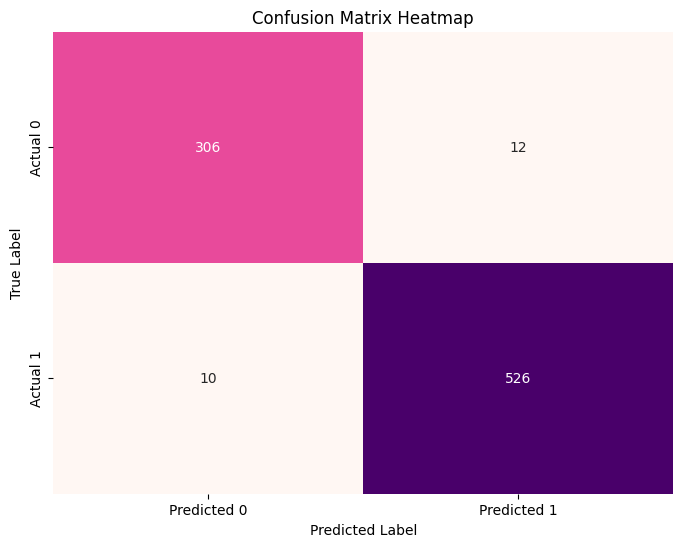

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()
df['education'] = le.fit_transform(df['education'])
df['self_employed'] = le.fit_transform(df['self_employed'])
df['loan_status'] = le.fit_transform(df['loan_status'])

X = df.drop(['loan_status'], axis=1)
y = df['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='RdPu', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


## Summary

## Q1) What are the data types? (Only numeric and categorical)
 loan_id                      int64 numerical

 no_of_dependents             int64 numerical

 education                   object categorical

 self_employed               object categorical

 income_annum                 int64 numerical

 loan_amount                  int64 numerical

 loan_term                    int64 numerical

 cibil_score                  int64 numerical

 residential_assets_value     int64 numerical

 commercial_assets_value      int64 numerical

 luxury_assets_value          int64 numerical

 bank_asset_value             int64 numerical

 loan_status                 object categorical



## Q2 and Q5) Are there missing values? Which independent variables have missing data? How much?
A2 and A5) As we can see based on this information, there are no missing values in any of these columns and for any independent variables.

## Q3 and Q10) What are the likely distributions of the numeric variables? What are the distributions of the predictor variables?
Explained with graphs, please refer above distributions demonstrated to view distributions of all features and independent variables

## Q4 and Q8) Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods) Which predictor variables are the most important?
A4 and A8) There is a noticeable correlation among the variables, with the highest correlation observed between luxury_asset_value and income_annum & loan_amount and income_annum. This could imply that these variables are essentially measuring or predicting the same underlying aspect.
From the OLS regression results we also understand that the following predictor variables have relatively larger absolute coefficients, indicating higher importance:
cibil_score: The coefficient for cibil_score is 0.0017, suggesting a significant impact on the loan_status.
loan_term: The coefficient for loan_term is -0.0171, indicating its importance in predicting the loan_status.
loan_amount: The coefficient for loan_amount is 9.952e-09, suggesting a non-negligible impact.


## Q6) Do the training and test sets have the same data?
A6) Yes, the training and test sets are derived from the same dataset. The dataset is partitioned into a training set, which the model learns from, and test sets, used to evaluate the model's performance. This ensures that the model generalizes well to unseen data, providing a reliable assessment of its effectiveness. Hence, we can say that the data is the same for both training and test sets. Also, from above histogram plots its evident that the distributions are almost same for all train and test sets


## Q7) Is the predictor variables independent of all the other predictor variables?
A7) The analysis of the correlation matrix and heatmap indicates the existence of multicollinearity among the independent variables. Notably, the strongest correlations are observed between luxury_asset_value and income_annum, as well as between loan_amount and income_annum. If two variables are highly correlated, removing one of them might help in reducing multicollinearity. However, on further assessment we observe that all of these column although directly related will be important in predicting the target variable and affect the model performance which is why we need to retain these columns. We have derived this conclusion by observing the heatmap and pairplot for independent variables.


## Q9) Do the ranges of the predictor variables make sense?
#### loan_id:
The loan_id ranges from 1 to 4269, indicating unique identifiers for each loan application.
No specific inferences can be made about outliers or trends based on loan_id.

#### no_of_dependents:
The variable 'no_of_dependents' has a range from 0 to 5.
The mean is approximately 2.5, indicating an average number of dependents.
There are no negative values, suggesting valid data.
Most loans have a low to moderate number of dependents based on the 25th, 50th (median), and 75th percentiles.

#### income_annum:
The income_annum ranges from 200,000 to 9,700,000.
The mean income_annum is around 5,059,124.
The distribution of income_annum seems wide, with a large standard deviation.
Most incomes fall within the interquartile range (25th to 75th percentiles).

#### loan_amount:
The loan_amount ranges from 300,000 to 39,200,000.
The mean loan_amount is approximately 15,133,450.
The distribution of loan_amount also appears wide, with a large standard deviation.
Most loan amounts fall within the interquartile range.

#### loan_term:
Loan terms range from 2 to 20 years, with an average of around 10.9 years.
Most loans have terms between 6 and 16 years, based on percentiles.

#### cibil_score:
CIBIL scores range from 300 to 900.
The mean cibil_score is around 599.94.
The distribution of cibil_score seems to be centered around the mean.

#### residential_assets_value, commercial_assets_value, luxury_assets_value, bank_asset_value:
The values for these assets range from negative to positive.
It's unusual to have negative values for assets; further investigation is needed to understand this.

#### loan_status:
Loan_status is categorical, indicating whether a loan is approved or denied.
There are two unique values: 0 and 1, possibly denoting binary categories.

   

## Q11) Remove outliers and keep outliers (does if have an effect of the final predictive model)?
A11) After removing outliers:
Accuracy Improvement: 14.29%
Precision Improvement: 11.11%
Recall Improvement: -5.00%
F1-score Improvement: 3.90%

## Q12) Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values?  That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.
A12) In terms of percentage error, KNN Imputation generally performs better, but Mean Imputation has lower Bias and Variance. Mean Imputation demonstrated lower bias and variance, resulting in more accurate imputations compared to Median Imputation, while KNN Imputation showed lower percentage errors.







*REFERENCES*

1. https://www.statology.org/how-to-read-a-correlation-matrix/

2. https://datascienceparichay.com/article/pandas-count-missing-values-in-each-column/

3. https://www.kdnuggets.com/2020/10/guide-linear-regression-models.html
   
4. "An Introduction to Statistical Learning" by James, Witten, Hastie, and Tibshirani
   
5. Refered Kaggle contributions for oversampling
   
6. Python Data Science Handbook" by Jake VanderPlas

7. Matplotlib documentation

MIT License

Copyright (c) 2024 prarthanashetty29

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.